<a href="https://colab.research.google.com/github/itismeganrms/rl-a3/blob/main/Code/actor_critic_no_bs_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 39.8 MB/s eta 0:0

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
<ipython-input-1-5668bfc6a82c>:66: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarra

Episode 1, Total Reward: -73.38070429930721
Episode 2, Total Reward: -322.7522828352887
Episode 3, Total Reward: -323.34118977599
Episode 4, Total Reward: -256.41983221392286
Episode 5, Total Reward: -153.92229206014534
Episode 6, Total Reward: -90.96039674469674
Episode 7, Total Reward: -123.50832025380885
Episode 8, Total Reward: -67.32026391352538
Episode 9, Total Reward: -61.0955707994122
Episode 10, Total Reward: -159.69274611690196
Episode 11, Total Reward: -189.11072156837997
Episode 12, Total Reward: -203.00628555068738
Episode 13, Total Reward: -320.02097726338377
Episode 14, Total Reward: -178.06225028857443
Episode 15, Total Reward: -240.9115263655832
Episode 16, Total Reward: -183.0854736735286
Episode 17, Total Reward: -124.17863297976373
Episode 18, Total Reward: -25.438058074275034
Episode 19, Total Reward: -307.4164500423659
Episode 20, Total Reward: -224.51257115442644
Episode 21, Total Reward: -189.908208458096
Episode 22, Total Reward: -107.2614536875163
Episode 23, 

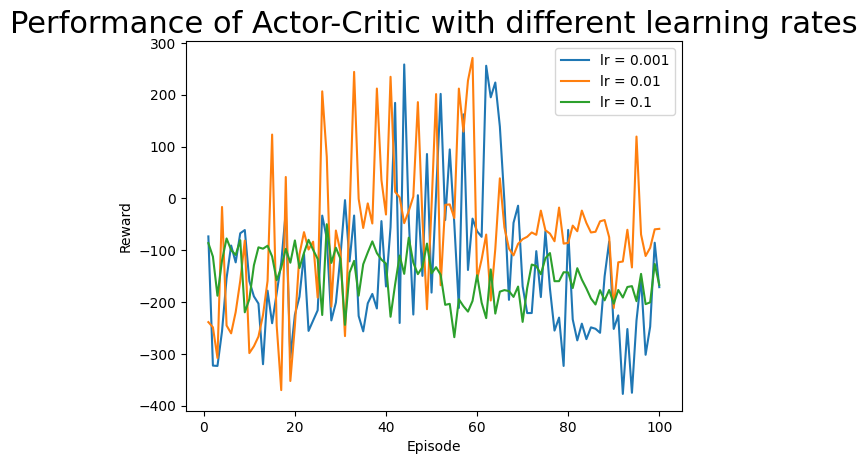

In [1]:
# -*- coding: utf-8 -*-
"""actor_critic_no_bs.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1e3rKAo14FuXozlNqpDnSfN5rAYrx4rcG
"""

!pip install wandb
!pip install swig
!pip install gym[all]
!pip install pygame

import torch
import torch.nn as nn
import torch.optim as optim
import gym
import numpy as np
import matplotlib.pyplot as plt

# Actor Network
class Actor(nn.Module):
    def __init__(self, input_size=8, output_size=4, hidden_size=128):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, state):
        x = self.relu(self.fc1(state))
        x = self.fc2(x)
        return x

# Critic Network
class Critic(nn.Module):
    def __init__(self, input_size=8, hidden_size=128):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.relu = nn.ReLU()

    def forward(self, state):
        x = self.relu(self.fc1(state))
        x = self.fc2(x)
        return x

# Actor-Critic Model
class ActorCritic(nn.Module):
    def __init__(self, actor, critic, lr):
        super(ActorCritic, self).__init__()
        self.actor = actor
        self.critic = critic
        self.actor_optimizer = optim.Adam(actor.parameters(), lr=0.001)
        self.critic_optimizer = optim.Adam(critic.parameters(), lr=0.001)

    def forward(self, state):
        action_probs = torch.softmax(self.actor(state), dim=-1)
        state_value = self.critic(state)
        return action_probs, state_value



# Training loop
def update(agent, states, actions, rewards, next_states, dones, gamma=0.99):
    states = torch.tensor(states, dtype=torch.float32)
    actions = torch.tensor(actions, dtype=torch.int64).view(-1, 1)
    rewards = torch.tensor(rewards, dtype=torch.float32).view(-1, 1)
    next_states = torch.tensor(next_states, dtype=torch.float32)
    dones = torch.tensor(dones, dtype=torch.float32).view(-1, 1)

    # Compute TD targets
    with torch.no_grad():
        _, next_state_values = agent(next_states)
        td_targets = rewards + gamma * (1 - dones) * next_state_values

    # Compute advantages
    _, state_values = agent(states)
    advantages = td_targets - state_values

    # Actor loss
    action_probs, _ = agent(states)
    log_probs = torch.log(action_probs.gather(1, actions))
    actor_loss = -(log_probs * advantages.detach()).mean()

    # Critic loss
    critic_loss = nn.MSELoss()(state_values, td_targets)

    # Update actor and critic networks
    agent.actor_optimizer.zero_grad()
    actor_loss.backward()
    agent.actor_optimizer.step()

    agent.critic_optimizer.zero_grad()
    critic_loss.backward()
    agent.critic_optimizer.step()


def run(agent, env, n_episodes):
  epi_reward = []
  for i_episode in range(n_episodes):
    state = env.reset()
    done = False
    total_reward = 0
    while not done:
        action_probs, _ = agent(torch.tensor(state, dtype=torch.float32).unsqueeze(0))
        action = torch.multinomial(action_probs, num_samples=1).item()
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        update(agent, [state], [action], [reward], [next_state], [done])
        state = next_state
    print(f"Episode {i_episode + 1}, Total Reward: {total_reward}")
    epi_reward.append(total_reward)
  env.close()
  return epi_reward



def main():
  # Create Lunar Lander environment
  env = gym.make('LunarLander-v2')
  state_size = env.observation_space.shape[0]
  action_size = env.action_space.n
  n_episodes = 100

  # Create actor, critic, and agent
  actor1 = Actor(state_size, action_size)
  critic1 = Critic(state_size)
  agent1 = ActorCritic(actor1, critic1, 0.001)
  e_array = [i for i in range(1, n_episodes+1)]

  r_array1 = run(agent1, env, n_episodes)

  # Define optimizer for actor and critic

  actor2 = Actor()
  critic2 = Critic()
  agent2 = ActorCritic(actor2, critic2, 0.01)

  r_array2 = run(agent2, env, n_episodes)


  actor3 = Actor()
  critic3 = Critic()
  agent3 = ActorCritic(actor3, critic3, 0.1)

  r_array3 = run(agent2, env, n_episodes)


  plt.title("Performance of Actor-Critic with different learning rates",fontsize=22)
  plt.plot(e_array, r_array1, label = "lr = 0.001")
  plt.plot(e_array,r_array2, label = "lr = 0.01")
  plt.plot(e_array,r_array3, label = "lr = 0.1")
  plt.xlabel('Episode')
  plt.ylabel('Reward')
  plt.legend()
  plt.show()



main()